# **Setup**

In [1]:
!pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imgaug-0.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imgaug/*
Proceed (Y/n)? y
  Successfully uninstalled imgaug-0.4.0
Found existing installation: albumentations 1.2.1
Uninstalling albumentations-1.2.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/albumentations-1.2.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/albumentations/*
Proceed (Y/n)? y
  Successfully uninstalled albumentations-1.2.1
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-au7q2hdr
  Running command git clone --filter=blob:none --quiet https://github.com/aleju/imgaug.git /tmp/pip-req-build-au7q2hdr
  Resolved https://github.com/aleju/imgaug.git to commit 0101108d4fed06bc5056c4a03e2bcb0216dac326
  Preparing metadata (setup.py) ... done
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=960989 sha256=92cfd5bed78

In [2]:
!pip install qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 15.6 MB/s eta 0:00:00
  Created wheel fo

# **Dependencies**

In [3]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [4]:
import torch
import torchvision
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [5]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# **Loading Dataset (pytorch)**

In [107]:
n_samples = 100
X_train = datasets.MNIST(root='./data', train=True, download=True,
 transform=transforms.Compose([transforms.ToTensor()]))
# Leaving only labels 0 and 1
idx = np.append(np.where(X_train.targets == 0)[0][:n_samples],
 np.where(X_train.targets == 1)[0][:n_samples])
X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]
train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

In [108]:
n_samples = 50
X_test = datasets.MNIST(root='./data', train=False, download=True,
 transform=transforms.Compose([transforms.ToTensor()]))
idx = np.append(np.where(X_test.targets == 0)[0][:n_samples],
 np.where(X_test.targets == 1)[0][:n_samples])
X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]
test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)

RuntimeError: ignored

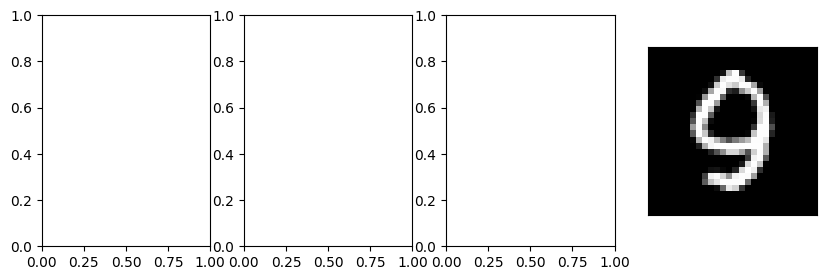

In [142]:
n_samples_show = 4
data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))
while n_samples_show > 0:
 images, targets = data_iter.__next__()
 axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
 axes[n_samples_show - 1].set_xticks([])
 axes[n_samples_show - 1].set_yticks([])
 axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))

 n_samples_show -= 1

In [6]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=50, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 198577200.17it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 85972813.22it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 74788223.55it/s]


Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15731237.63it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [ ]:
train_loader

# **Implementation of Quantum-CNN**

In [53]:
class QuantumCircuit:
 """
 This class provides a simple interface for interaction
 with the quantum circuit
 """

 def __init__(self, n_qubits, backend, shots):
 # --- Circuit definition ---
  self._circuit = qiskit.QuantumCircuit(n_qubits)

  all_qubits = [i for i in range(n_qubits)]
  self.theta = qiskit.circuit.Parameter('theta')

  self._circuit.h(all_qubits)
  self._circuit.barrier()
  self._circuit.ry(self.theta, all_qubits)

  self._circuit.measure_all()
  # ---------------------------
  self.backend = backend
  self.shots = shots

 def run(self, thetas):
  if not isinstance(thetas, torch.Tensor):
    thetas = torch.tensor(thetas)

  thetas = thetas.view(-1)
  thetas = thetas.tolist()
  t_qc = transpile(self._circuit,
  self.backend)
  qobj = assemble(t_qc,
  shots=self.shots,
  parameter_binds = [{self.theta: theta} for theta in thetas])
  job = self.backend.run(qobj)
  result = job.result().get_counts()

  counts = np.array(list(result.values()))
  states = np.array(list(result.keys())).astype(float)

  # Compute probabilities for each state
  probabilities = counts / self.shots
  # Get state expectation
  expectation = np.sum(states * probabilities)

  #return np.array([expectation])
  return torch.tensor([expectation])

In [54]:
class HybridFunction(Function):
 """ Hybrid quantum - classical function definition """

 @staticmethod
 def forward(ctx, input, quantum_circuit, shift):
  """ Forward pass computation """
  ctx.shift = shift
  ctx.quantum_circuit = quantum_circuit
  expectation_z = ctx.quantum_circuit.run(input[0].tolist())
  result = torch.tensor([expectation_z])
  ctx.save_for_backward(input, result)
  return result

 @staticmethod
 def backward(ctx, grad_output):
  """ Backward pass computation """
  input, expectation_z = ctx.saved_tensors
  input_list = np.array(input.tolist())
  #input_list = input.detach().numpy()

  shift_right = input_list + np.ones(input_list.shape) * ctx.shift
  shift_left = input_list - np.ones(input_list.shape) * ctx.shift

  gradients = []
  for i in range(len(input_list)):
    expectation_right = ctx.quantum_circuit.run(shift_right[i])
    expectation_left = ctx.quantum_circuit.run(shift_left[i])

    gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
    gradients.append(gradient)
  gradients = np.array([gradients]).T
  return torch.tensor([gradients]).float() * grad_output.float(), None, None
class Hybrid(nn.Module):
 """ Hybrid quantum - classical layer definition """

 def __init__(self, backend, shots, shift):
  super(Hybrid, self).__init__()
  self.quantum_circuit = QuantumCircuit(1, backend, shots)
  self.shift = shift

 def forward(self, input):
  return HybridFunction.apply(input, self.quantum_circuit, self.shift)

In [61]:
class Net(nn.Module):
 def __init__(self):
  super(Net, self).__init__()
  self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
  self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
  self.dropout = nn.Dropout2d()
  self.fc1 = nn.Linear(256, 64)
  self.fc2 = nn.Linear(64, 10)
  self.hybrid = Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2)

 def forward(self, x):
  x = F.relu(self.conv1(x))
  x = F.max_pool2d(x, 2)
  x = F.relu(self.conv2(x))
  x = F.max_pool2d(x, 2)
  x = self.dropout(x)
  #x = x.view(1, -1)
  x = x.view(x.size(0), -1)
  x = F.relu(self.fc1(x))
  x = self.fc2(x)
  x = x.view(-1)
  x = self.hybrid(x)
  #return torch.cat((x, 1 - x), -1)
  return x

In [62]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
epochs = 5
loss_list = []
model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        model.eval()
    with torch.no_grad():

        correct = 0
        for batch_idx, (data, target) in enumerate(test_loader):
            output = model(data)

            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

            loss = loss_func(output, target)
            total_loss.append(loss.item())


    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]'.format(
    100. * (epoch + 1) / epochs))
    print('Performance on validation data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(test_loader) * 100)
        )

<ipython-input-53-efbc4d55e63c>:34: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = self.backend.run(qobj)


RuntimeError: ignored

Text(0, 0.5, 'Neg Log Likelihood Loss')

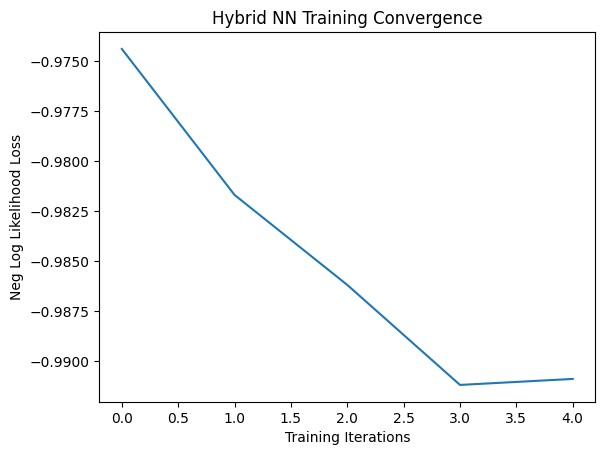

In [76]:
plt.plot(loss_list)
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg Log Likelihood Loss')

Text(0, 0.5, 'Neg Log Likelihood Loss')

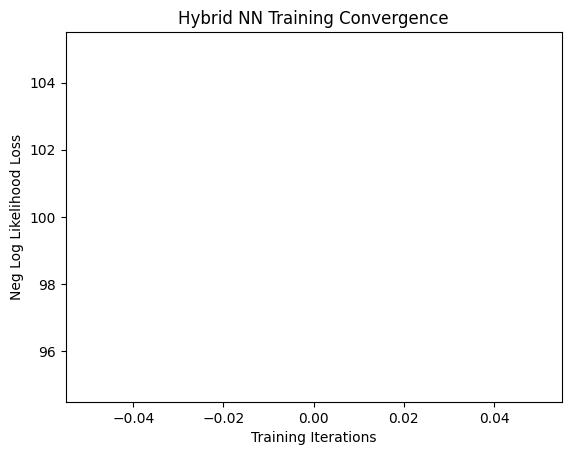

In [78]:
plt.plot()
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg Log Likelihood Loss')

# **Loading Dataset (Tensorflow)**

In [42]:
(X_traink, y_traink), (X_testk, y_testk) = mnist.load_data()

# **Implementation of classical CNN**
Classical Keras CNN for comparison purposes

Epoch 1/12
10500/10500 [==============================] - 52s 5ms/step - loss: 1.2907 - accuracy: 0.5369 - val_loss: 0.5691 - val_accuracy: 0.8563
Epoch 2/12
10500/10500 [==============================] - 47s 4ms/step - loss: 0.9350 - accuracy: 0.6675 - val_loss: 0.4897 - val_accuracy: 0.8678
Epoch 3/12
10500/10500 [==============================] - 45s 4ms/step - loss: 0.8825 - accuracy: 0.6914 - val_loss: 0.4791 - val_accuracy: 0.8763
Epoch 4/12
10500/10500 [==============================] - 48s 5ms/step - loss: 0.8616 - accuracy: 0.7057 - val_loss: 0.4452 - val_accuracy: 0.8833
Epoch 5/12
10500/10500 [==============================] - 46s 4ms/step - loss: 0.8466 - accuracy: 0.7114 - val_loss: 0.4346 - val_accuracy: 0.8881
Epoch 6/12
10500/10500 [==============================] - 48s 5ms/step - loss: 0.8298 - accuracy: 0.7162 - val_loss: 0.4242 - val_accuracy: 0.8908
Epoch 7/12
10500/10500 [==============================] - 48s 5ms/step - loss: 0.8269 - accuracy: 0.7181 - val_loss: 0

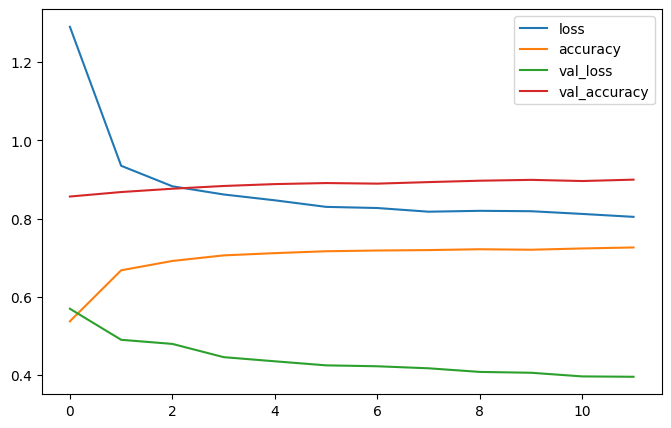

In [44]:
X_traink = X_traink/255.0

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=x_train_filtered.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

X_traink = np.array(X_traink)
y_traink = np.array(y_traink)

model_history = model.fit(X_traink, y_traink, batch_size=4, epochs=12, validation_split=0.3)

print(model.summary())
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()